# Introduction

Nos données pour aujourd'hui sont un fichier CSV:
```
0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
0,0,2,0,4,2,2,1,6,7,10,7,9,13,8,8,15,10,10,7,17,4,4,7,6,15,6,4,9,11,3,5,6,3,3,4,2,3,2,1
0,1,1,3,3,1,3,5,2,4,4,7,6,5,3,10,8,10,6,17,9,14,9,7,13,9,12,6,7,7,9,6,3,2,2,4,2,0,1,1
```

On veut pouvoir:
- charger des données en mémoire;
- calculer des statistiques sur ces données
- créer des graphiques des résultats.

Pour cet atelier nous utiliserons [Python 3](https://docs.python.org/3/). Vous pouvez à tout moment vous référer au matériel d'origine de [Software Carpentry](http://swcarpentry.github.io/python-novice-inflammation/).

# Numpy

Pour débuter, nous avons besoin de charger le module numpy qui sera utilisé pour représenter nos données en mémoire.

In [2]:
import numpy

On peut maintenant utiliser numpy pour charger notre fichier csv.

In [3]:
numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

Le fichier chargé en mémoire est affiché à l'écran, mais on ne peut pas le manipuler directement. Pour ce faire, il faut créer une variable.

Par exemple, créons une variable `weight_kg` contenant un poid en kilogramme.

In [4]:
weight_kg = 57

On peut à tout moment afficher le contenu d'une variable à l'aide la fonction `print`.

In [ ]:
print(weight_kg)

On peut même effectuer des opérations arithmétiques, par exemple convertir en livre.

In [6]:
print("Le poids en livres est: ", weight_kg * 2.2)

Le poids en livres est:  125.4


On peut assigner une nouvelle valeur à la variable

In [7]:
weight_lb = weight_kg * 2.2
print('Le poids en livre est maintenant:', weight_lb)

Le poids en livre est maintenant: 125.4


Tout comme on assigne une valeur à une variable, on peut assigner à une variable le résultat d'un appel de fonction.

In [8]:
data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')

Puis affichez le résultat de cette assignation à l'aide de la fonction `print` 

In [9]:
print(data)

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


À tout moment, on peut connaître le type d'une variable en utilisant la fonction `type`.

In [11]:
type(weight_lb)

float

In [12]:
type(data)

numpy.ndarray

Notre structure de données représentée par la variable `data` a aussi des propriétés, par exemple `dtype`.

In [13]:
print(data.dtype)

float64


On peut aussi afficher les dimensions de notre tableau en accédant à la propriété `shape`.

In [14]:
print(data.shape)

(60, 40)


Pour accéder à un élément de notre tableau, nous utilisons les crochets ou "brackets" ([]). Par exemple, essayons d'accéder à l'élément de la ligne 30 et de la colonne 20.

In [15]:
data[30, 20]

13.0

À votre avis, quels sont les indices correspondant à l'élément situé à sur la première ligne et la première colonne?

In [20]:
print(data[0, 0])

0.0


On peut non seulement extraire des éléments, mais aussi des sous-ensemble de notre tableau en utilisant le concept de tranche représenté par l'opérateur `:`.

In [21]:
data[0:5, 0:10]

array([[ 0.,  0.,  1.,  3.,  1.,  2.,  4.,  7.,  8.,  3.],
       [ 0.,  1.,  2.,  1.,  2.,  1.,  3.,  2.,  2.,  6.],
       [ 0.,  1.,  1.,  3.,  3.,  2.,  6.,  2.,  5.,  9.],
       [ 0.,  0.,  2.,  0.,  4.,  2.,  2.,  1.,  6.,  7.],
       [ 0.,  1.,  1.,  3.,  3.,  1.,  3.,  5.,  2.,  4.]])

Les indices des tranches ne doivent pas obligatoirement démarré à 0.

In [24]:
data[5, 10:20]

array([  7.,   6.,   6.,   9.,   9.,  15.,   4.,  16.,  18.,  12.])

Il n'y a pas non plus d'obligation de définir la borne inférieure et supérieure des tranches. Ainsi, on peut appeler directement:

In [26]:
small_table = data[:5, 30:]
print("Notre petite table:", small_table)

Notre petite table: [[  4.   4.   5.   7.   3.   4.   2.   3.   0.   0.]
 [  3.   5.   4.   4.   5.   5.   1.   1.   0.   1.]
 [ 10.   5.   4.   2.   2.   3.   2.   2.   1.   1.]
 [  3.   5.   6.   3.   3.   4.   2.   3.   2.   1.]
 [  9.   6.   3.   2.   2.   4.   2.   0.   1.   1.]]


On peut appliquer des opérations avec des scalaires directement sur notre tableau. Par exemple, si on voulait multiplier chacune des valeurs du tableau précédent, on ferait ceci:

In [30]:
doubletbl = small_table * 2
print(doubletbl)

[[  8.   8.  10.  14.   6.   8.   4.   6.   0.   0.]
 [  6.  10.   8.   8.  10.  10.   2.   2.   0.   2.]
 [ 20.  10.   8.   4.   4.   6.   4.   4.   2.   2.]
 [  6.  10.  12.   6.   6.   8.   4.   6.   4.   2.]
 [ 18.  12.   6.   4.   4.   8.   4.   0.   2.   2.]]


On peut aussi effectuer des opérations entre des tableaux. On peut par exemple additioner le premier et le second tableau que nous avons créés.

In [33]:
tripletbl = small_table + doubletbl
print(tripletbl)

[[ 12.  12.  15.  21.   9.  12.   6.   9.   0.   0.]
 [  9.  15.  12.  12.  15.  15.   3.   3.   0.   3.]
 [ 30.  15.  12.   6.   6.   9.   6.   6.   3.   3.]
 [  9.  15.  18.   9.   9.  12.   6.   9.   6.   3.]
 [ 27.  18.   9.   6.   6.  12.   6.   0.   3.   3.]]


Souvent, nous sommes intéréssés à réaliser des opérations plus complexes qu'additionner, multiplier ou soustraire. Numpy fournit des fonctions pour réaliser ces opérations plus complexes. Par exemple, si on veut déterminer la moyenne pour l'ensemble des données de notre tableau `data` : 

In [34]:
numpy.mean(data)

6.1487499999999997

Cette valeur représente l'inflammation moyenne pour tous les patients durant toute la période de leur séjour. On pourrait aussi vouloir calculer la valeur maximale, minimale et l'écart-type.

In [35]:
numpy.min(data)

0.0

In [36]:
numpy.max(data)

20.0

In [37]:
numpy.std(data)

4.6138331971185664

Pour en apprendre davantage sur une fonction, vous pouvez à tout moment appeler la fonction `help()` et fournir en argument le nom de la fonction d'intérêt.

In [ ]:
help(numpy.std)

Sachant que dans notre tableau, chaque ligne représente un patient. Comment pensez-vous qu'il serait possible de récupérer les données de séjour du premier patient?

In [41]:
print(data[0, :])

[  0.   0.   1.   3.   1.   2.   4.   7.   8.   3.   3.   3.  10.   5.   7.
   4.   7.   7.  12.  18.   6.  13.  11.  11.   7.   7.   4.   6.   8.   8.
   4.   4.   5.   7.   3.   4.   2.   3.   0.   0.]


Calculez la valeur d'inflammation maximum pour ce patient:

In [42]:
numpy.max(data[0, :])

18.0

Le tableau n'a pas seulement des propriétés tel que `shape`, il dispose aussi des fonctions qui lui sont propres, ou de méthodes. Pour appeler ces méthodes, on utilise l'opérateur `.`.

In [ ]:
data[2, :].max()

Les opérations sur un tableau peut s'effectuer en fonction des lignes, des colonnes ou de l'ensemble du tableau. Les lignes et les colonnes sont ce qu'on appelle les axes du tableau.

![alt text](python-operations-across-axes.png)

Par exemple, calculons l'inflammation moyenne par jour pour l'ensemble des patients. À quel graphique cela correspond-il?

In [47]:
avg_infla = numpy.mean(data, axis=0)
print(avg_infla.shape)

(40,)


Si on voulait plutôt calculer l'inflammation moyenne par patient, qu'est-ce qu'il faudrait changer?

In [48]:
numpy.mean(data, axis=1)
data.mean(axis=1)

array([ 5.45 ,  5.425,  6.1  ,  5.9  ,  5.55 ,  6.225,  5.975,  6.65 ,
        6.625,  6.525,  6.775,  5.8  ,  6.225,  5.75 ,  5.225,  6.3  ,
        6.55 ,  5.7  ,  5.85 ,  6.55 ,  5.775,  5.825,  6.175,  6.1  ,
        5.8  ,  6.425,  6.05 ,  6.025,  6.175,  6.55 ,  6.175,  6.35 ,
        6.725,  6.125,  7.075,  5.725,  5.925,  6.15 ,  6.075,  5.75 ,
        5.975,  5.725,  6.3  ,  5.9  ,  6.75 ,  5.925,  7.225,  6.15 ,
        5.95 ,  6.275,  5.7  ,  6.1  ,  6.825,  5.975,  6.725,  5.7  ,
        6.25 ,  6.4  ,  7.05 ,  5.9  ])

Les résultats de ces appels de fonctions sont toujours des tableaux Numpy. Comment faire pour s'en convaincre?

In [49]:
type(data.mean(axis=1))

numpy.ndarray

# matplotlib

La présentation de chiffre offre peu d'intuition quand à savoir ce qui passe véritablement avec nos données. Conjointement avec Numpy, nous pouvons utiliser le module `matplotlib` pour produire une représentation graphique de nos données.

Importez matplotlib.

In [50]:
import matplotlib

Pour garantir l'affichage à l'intérieur de notre notebook. Il faut appelez une commande magique qui est propre à l'environnement actuel

In [51]:
%matplotlib inline

On peut maintenant afficher nos données dans un premier temps comme un heatmap:

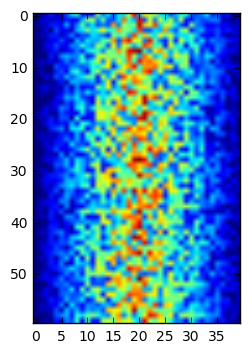

In [52]:
matplotlib.pyplot.imshow(data)
matplotlib.pyplot.show()

On peut aussi afficher des courbes, par exemple la courbe de l'inflammation moyenne par jour pour l'ensemble des patients.

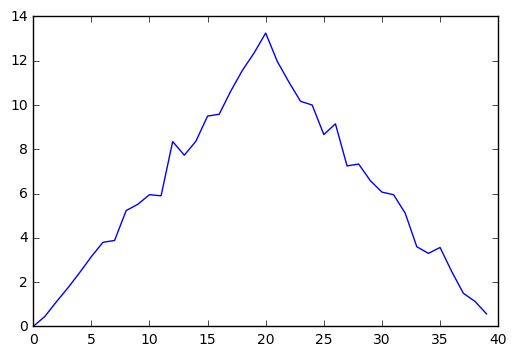

In [53]:
inflam_mean = numpy.mean(data, axis=0)
matplotlib.pyplot.plot(inflam_mean)
matplotlib.pyplot.show()

À partir de l'exemple précédent, produisez un graphique pour l'inflammation maximum ainsi qu'un graphique pour l'inflammation minimum.

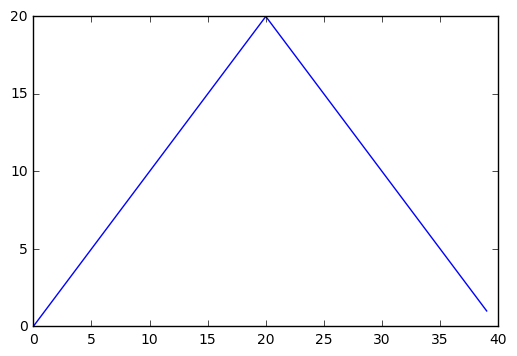

In [54]:
inflam_mean = numpy.max(data, axis=0)
matplotlib.pyplot.plot(inflam_mean)
matplotlib.pyplot.show()

Peut-on les superposer?

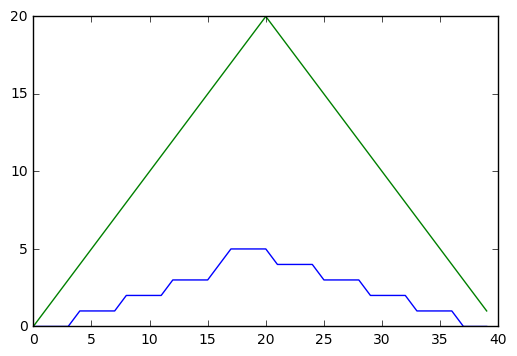

In [55]:
inflam_max = numpy.max(data, axis=0)
inflam_min = numpy.min(data, axis=0)
matplotlib.pyplot.plot(inflam_min)
matplotlib.pyplot.plot(inflam_max)
matplotlib.pyplot.show()

Tout peut être modifié sur un graphique, du nom des axes au titre, en passant par la légende et le format du trait de la courbe. La seule limite est votre imagination et votre patience.

Jetez un oeil à la gallerie d'exemples de [matplotlib](http://matplotlib.org/gallery.html).